In [1]:
import numpy as np
import trace_gen as tg
import matplotlib.pyplot as plt

In [7]:
def plot_hr_irt_with_skew(M, n, classes, skewness, freq_param):
    generator = tg.TraceGenerator(M, n)
    # params = generator.assign_params_with_skew(classes, skewness)
    trace = generator.generate_trace(classes, skewness, freq_param)
    c = np.arange(M//100, M, M//100)
    hr_lru = [tg.sim_lru(_c, trace) for _c in c]
    hr_fifo = [tg.sim_fifo(_c, trace) for _c in c]
    hr_clock = [tg.sim_clock(_c, trace) for _c in c]

    # Create a figure and two subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot hit rate
    axs[0].plot(c, hr_lru, label='LRU')
    axs[0].plot(c, hr_fifo, label='FIFO')
    axs[0].plot(c, hr_clock, label='CLOCK')
    axs[0].set_xlabel('Cache size (C)')
    axs[0].set_ylabel('Hit rate')
    axs[0].legend()
    axs[0].set_title(f'M={M}; n={n} num_classes={classes}; skewness={skewness}; freq_param={freq_param}')

    # Plot histogram
    irds = tg.iad(trace)
    irds = irds[irds > -1]
    axs[1].hist(irds, bins='auto')
    axs[1].set_xlabel('IRD')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('IRD Histogram')

    plt.show()

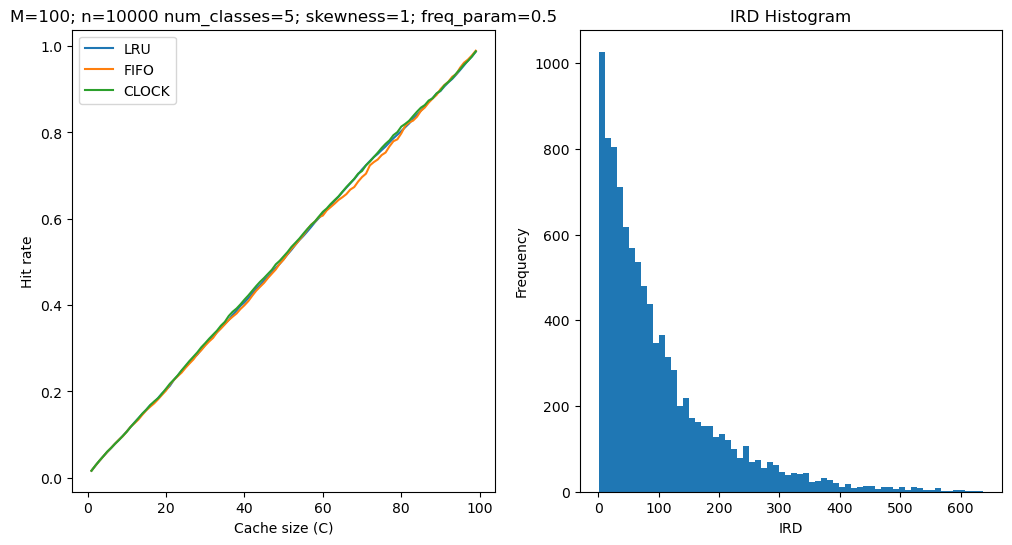

In [13]:
plot_hr_irt_with_skew(100, 10000, 5, 1, 0.5)
# When freq_param is 0.5, the trace is 50% freq-based and 50% ird-based, MRC behaves linear.

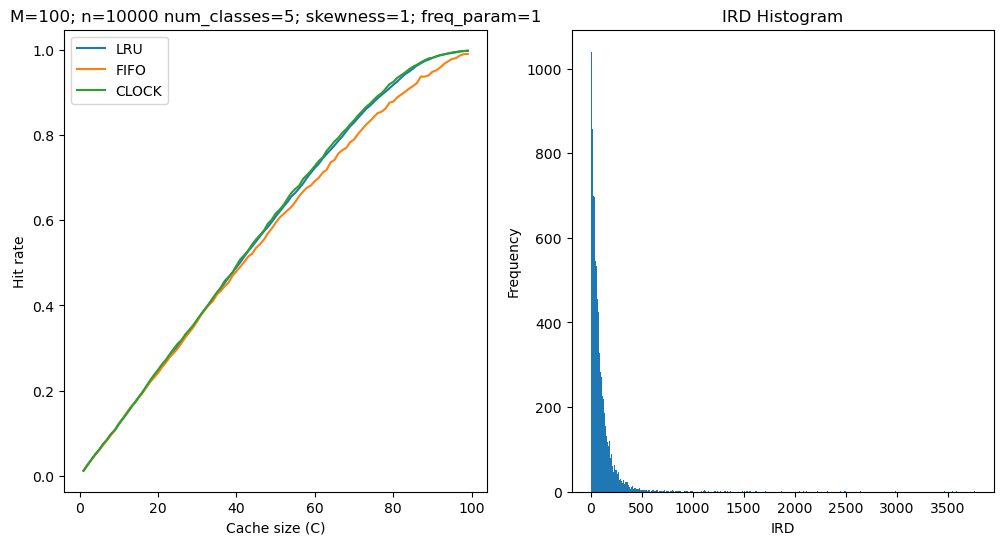

In [14]:
plot_hr_irt_with_skew(100, 10000, 5, 1, 1)
# When freq_param is 1, the trace is 100% freqency-based, MRC behaves convex; ird shows hyper-exponential distribution.

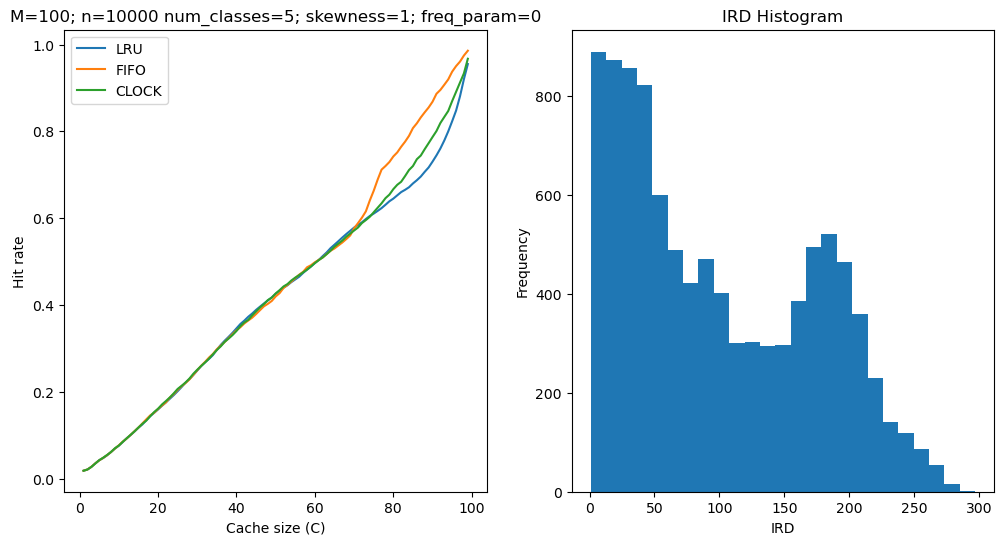

In [15]:
plot_hr_irt_with_skew(100, 10000, 5, 1, 0)
# When freq_param is 0, the trace is 100% ird-based, MRC behaves concave; ird shows piece-wise uniform distribution.

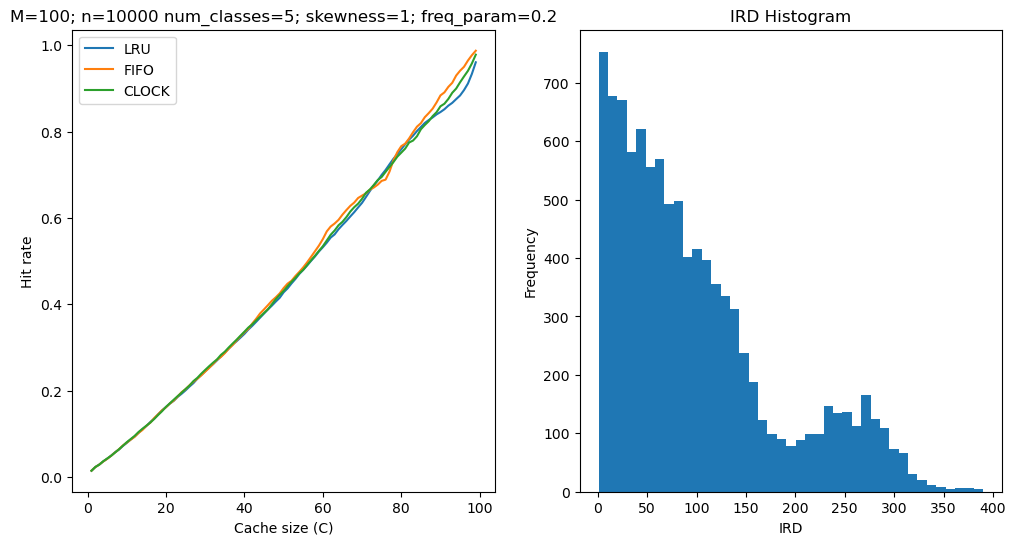

In [16]:
plot_hr_irt_with_skew(100, 10000, 5, 1, 0.2)
# When freq_param is 0.2, the trace is 20% freq-based and 80% ird-based, MRC behaves somewhat both convex and concave; ird shows mixture of hyper-exponential and piece-wise uniform distribution.

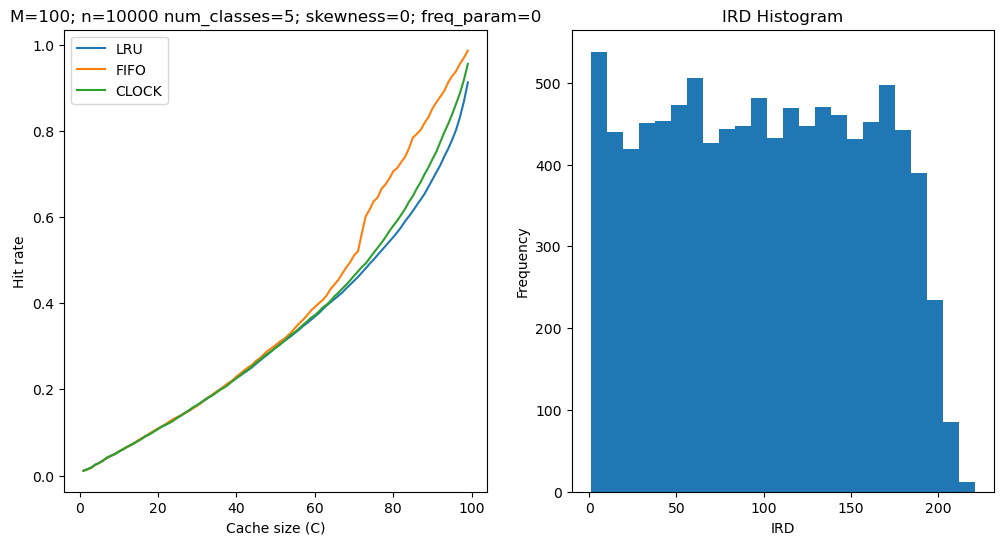

In [17]:
plot_hr_irt_with_skew(100, 10000, 5, 0, 0)
# When skewness is 0, param is 0, the weight of each classes of ird is uniform.

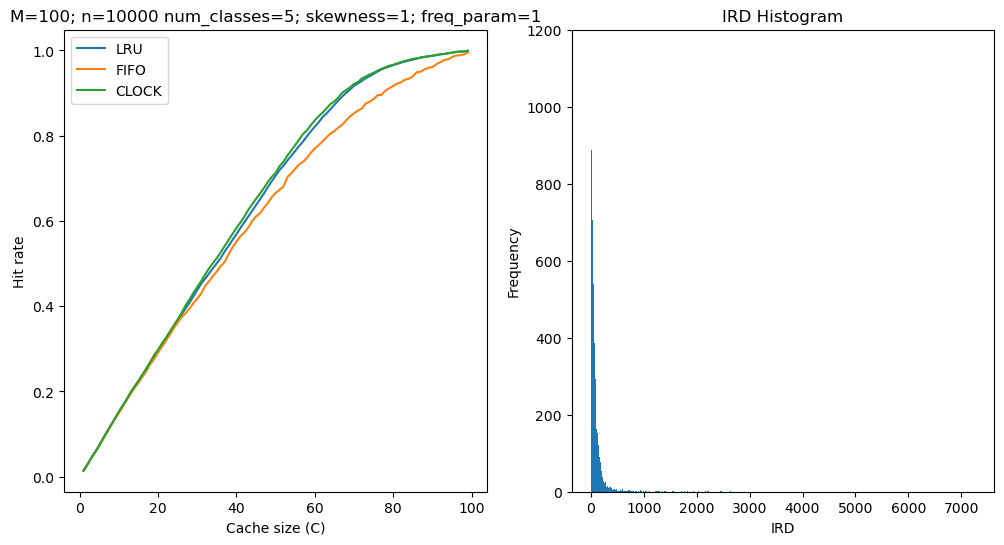

In [18]:
plot_hr_irt_with_skew(100, 10000, 5, 1, 1)
# When skewness is 1, param is 1, the weight of each classes of ird is skewed in 1 magnitude; ird shows hyper-exponential distribution.

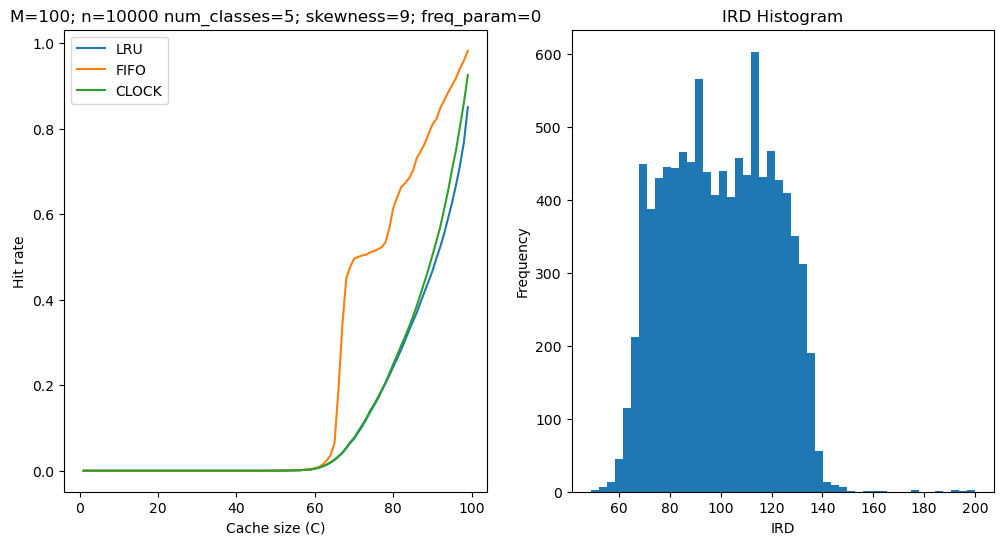

In [20]:
plot_hr_irt_with_skew(100, 10000, 5, 9, 0)
# When skewness is 9 and 100% ird-based, the weight of each class of ird is highly skewed.

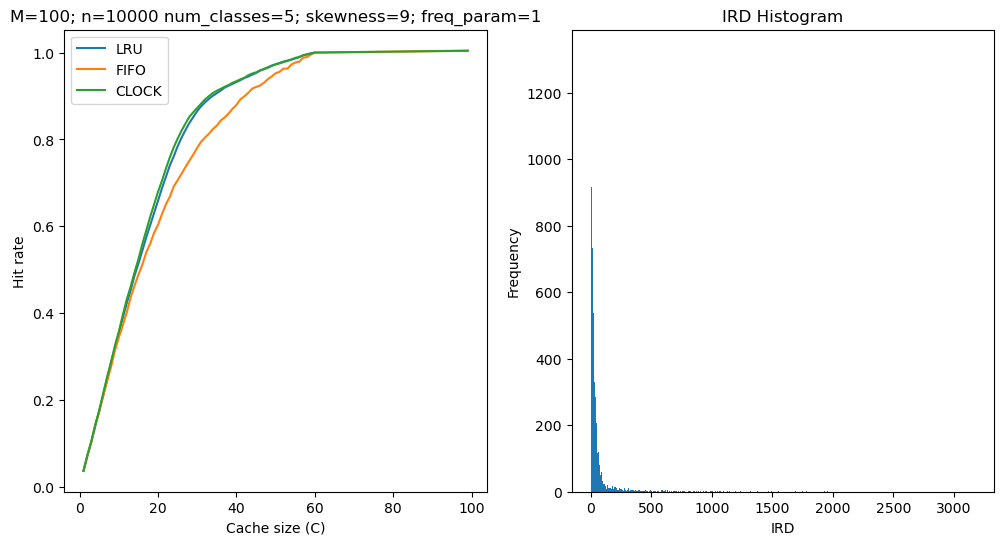

In [21]:
plot_hr_irt_with_skew(100, 10000, 5, 9, 1)
# When skewness is 9 and 100% freq-based, the weight of each class of addr is highly skewed.

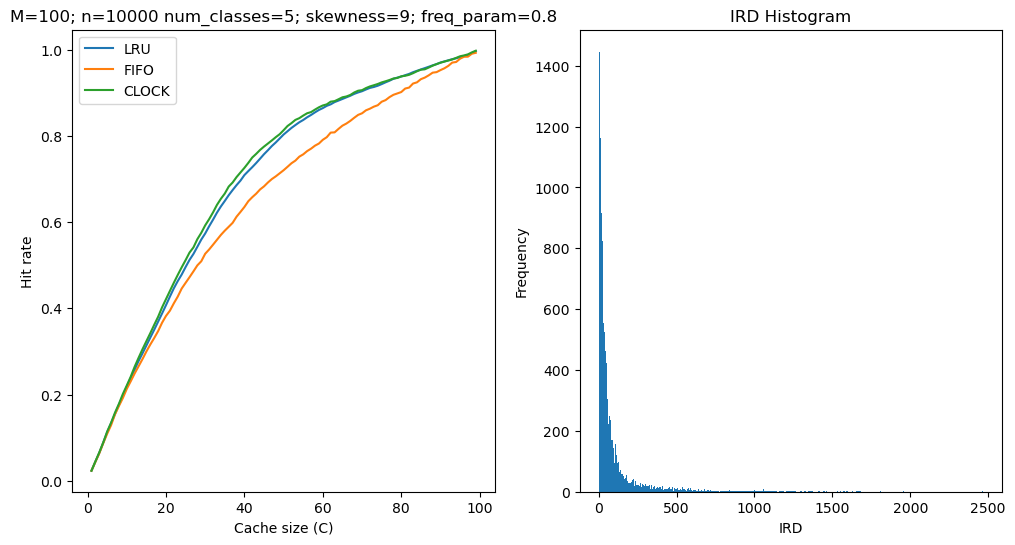

In [22]:
plot_hr_irt_with_skew(100, 10000, 5, 9, 0.8)
# When skewness set high, MRC convex/concave behavior is more significant; ird shows mixture of hyper-exponential and piece-wise uniform distribution according to p.

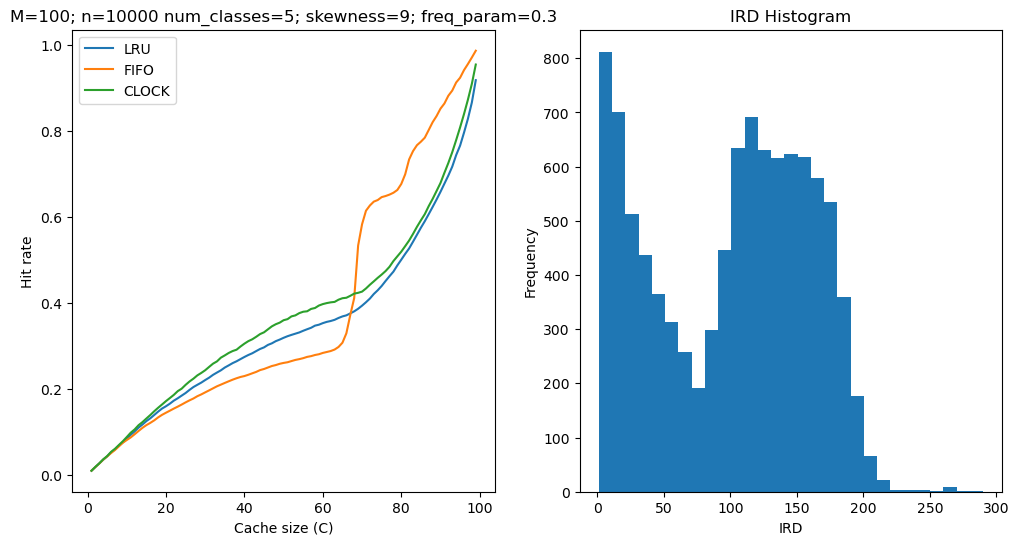

In [23]:
plot_hr_irt_with_skew(100, 10000, 5, 9, 0.3)

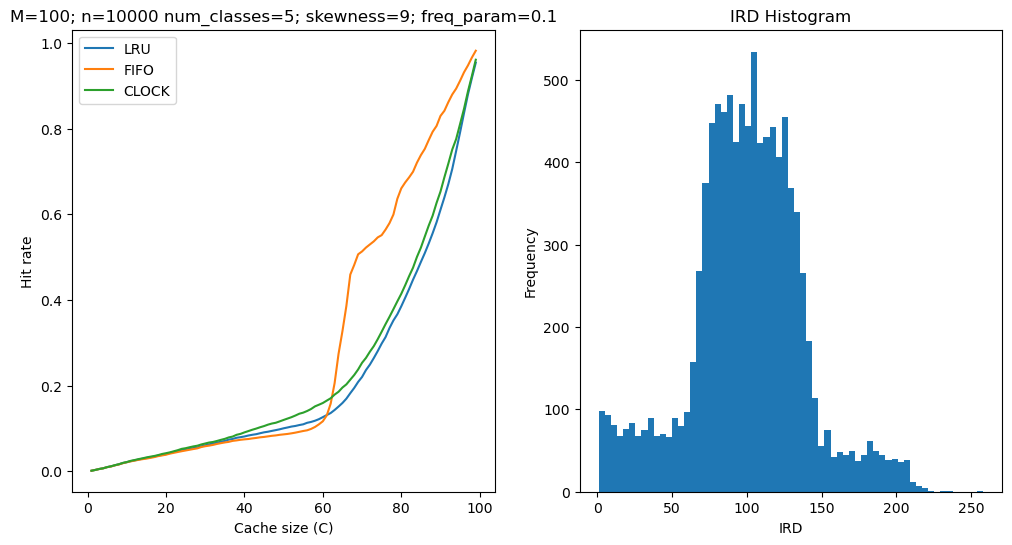

In [30]:
plot_hr_irt_with_skew(100, 10000, 5, 9, 0.1)

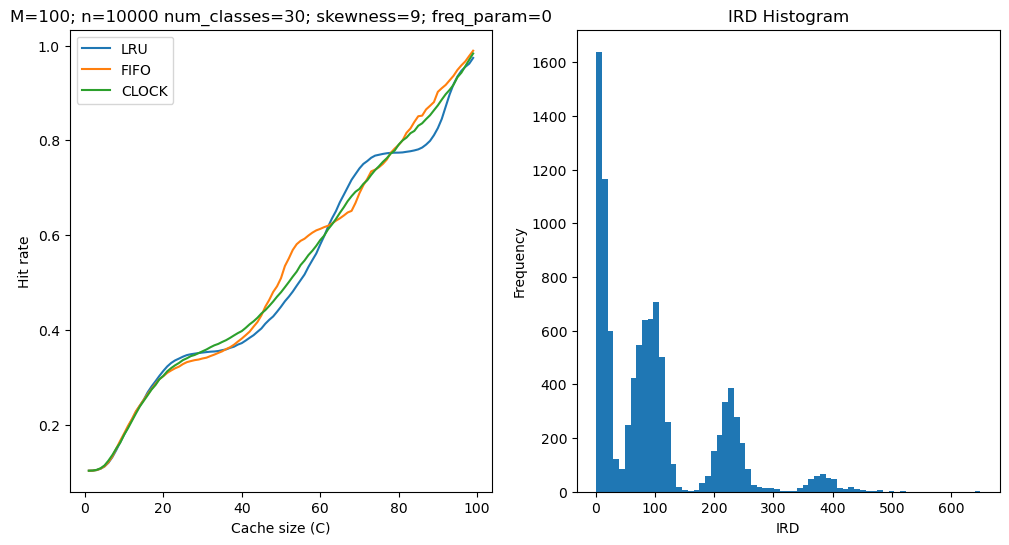

In [33]:
plot_hr_irt_with_skew(100, 10000, 30, 9, 0)
# When num_classes is high, MRCs show more mixed convex/concave behavior.

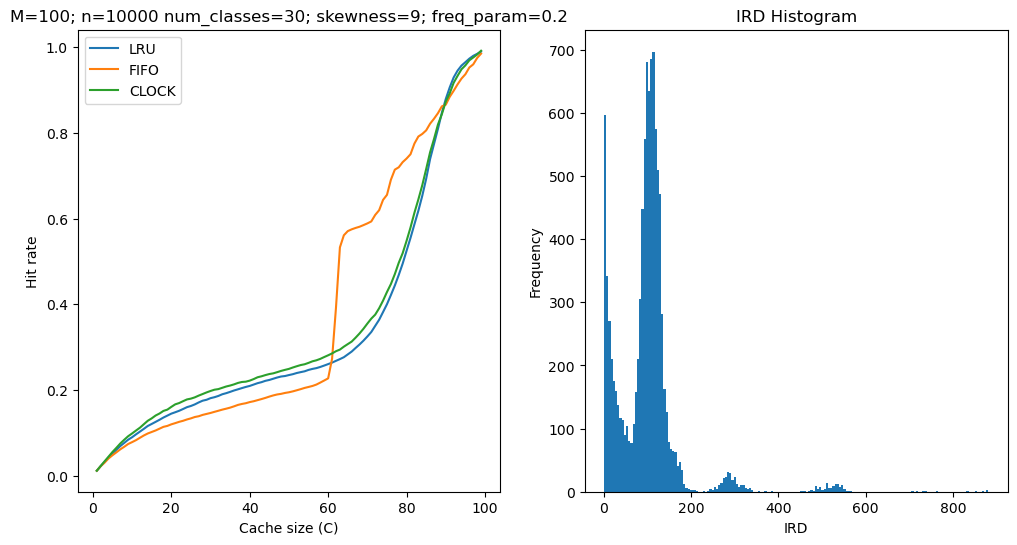

In [34]:
plot_hr_irt_with_skew(100, 10000, 30, 9, 0.2)

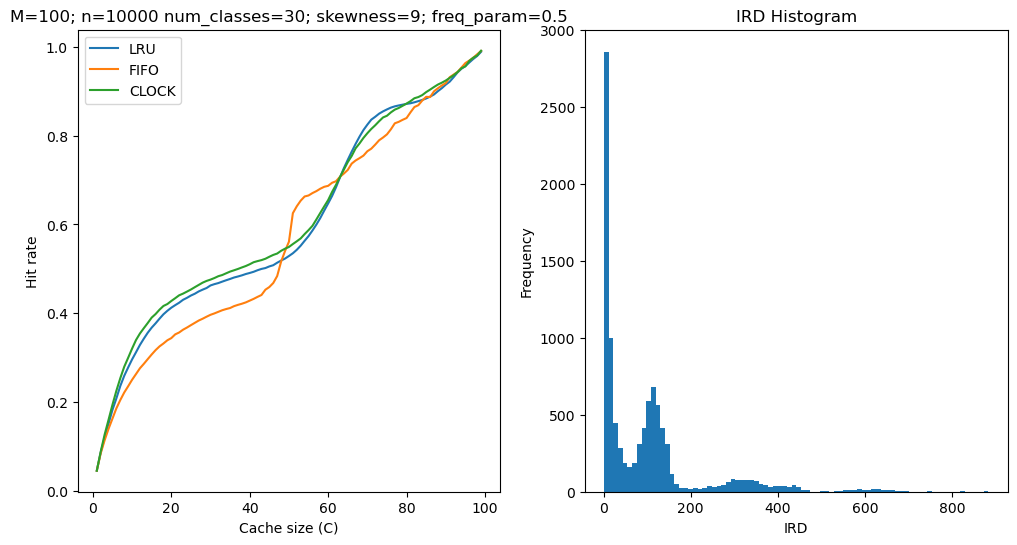

In [35]:
plot_hr_irt_with_skew(100, 10000, 30, 9, 0.5)